In [5]:
import os
from google.colab import files
import json

# Step 1: Upload Kaggle API Token
uploaded = files.upload()

# Save the uploaded file to ~/.kaggle/kaggle.json
os.makedirs("~/.kaggle", exist_ok=True)
with open("~/.kaggle/kaggle.json", "w") as f:
    json.dump(json.load(open(list(uploaded.keys())[0])), f)

# Set permissions for the Kaggle API token
os.chmod("~/.kaggle/kaggle.json", 600)

# Step 2: Install Kaggle package
!pip install kaggle

# Step 3: Define Dataset Path or Dataset Name
dataset_path = "saurav9786/amazon-product-reviews"  # Replace this with the dataset path or name

# Step 4: Download Dataset from Kaggle (using the dataset path)
!kaggle datasets download -d {dataset_path}  # Replace {dataset_path} with the correct dataset path

# Step 5: Unzip the Dataset
dataset_filename = "<dataset-name>.zip"  # Replace with your dataset's zip filename
!unzip -q {dataset_filename}  # Unzips the downloaded dataset file


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/saurav9786/amazon-product-reviews
License(s): unknown
100% 109M/109M [00:05<00:00, 22.9MB/s]
100% 109M/109M [00:05<00:00, 19.5MB/s]
/bin/bash: line 1: dataset-name: No such file or directory


In [6]:
import zipfile

# Path to the uploaded zip file
zip_file_path = '/content/amazon-product-reviews.zip'

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')  # Specify the directory where to unzip

print(f"Unzipped {zip_file_path} to /content/")


Unzipped /content/amazon-product-reviews.zip to /content/


In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("/content/ratings_Electronics (1).csv",
                             names=['userId', 'productId','rating','timestamp'])

In [9]:
df.head()


,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [10]:
print("Total Reviews:",df.shape[0])
print("Total Columns:",df.shape[1])

Total Reviews: 7824482
Total Columns: 4


In [11]:
# Taking subset of the dataset
df = df.iloc[:5000,0:]

In [12]:
print("Total Reviews:",df.shape[0])
print("Total Columns:",df.shape[1])

Total Reviews: 5000
Total Columns: 4


In [13]:
print("Total number of ratings :",df.rating.nunique())
print("Total number of users   :", df.userId.nunique())
print("Total number of products  :", df.productId.nunique())

Total number of ratings : 5
Total number of users   : 4929
Total number of products  : 299


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     5000 non-null   object 
 1   productId  5000 non-null   object 
 2   rating     5000 non-null   float64
 3   timestamp  5000 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 156.4+ KB


In [14]:
df.isnull().sum()

,0
userId,0
productId,0
rating,0
timestamp,0


In [15]:
# Check Duplicate data
df[df.duplicated()].any()

,0
userId,False
productId,False
rating,False
timestamp,False


In [16]:
# rating describe summary
df.describe()['rating']

,rating
count,5000.000000
mean,3.986600
std,1.411814
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [17]:
print("Unique value of Rating:",df.rating.unique())


Unique value of Rating: [5. 1. 3. 2. 4.]


In [18]:
# Find the minimum and maximum ratings
print('Minimum rating is: %d' %(df.rating.min()))
print('Maximum rating is: %d' %(df.rating.max()))

Minimum rating is: 1
Maximum rating is: 5


In [19]:
# Average rating of products
ratings = pd.DataFrame(df.groupby('productId')['rating'].mean())
ratings['ratings_count'] = pd.DataFrame(df.groupby('productId')['rating'].count())
ratings['ratings_average'] = pd.DataFrame(df.groupby('productId')['rating'].mean())
ratings.head(10)

,rating,ratings_count,ratings_average
productId,,,
0132793040,5.000000,1,5.000000
0321732944,5.000000,1,5.000000
0439886341,1.666667,3,1.666667
0511189877,4.500000,6,4.500000
0528881469,2.851852,27,2.851852
0558835155,3.000000,1,3.000000
059400232X,5.000000,3,5.000000
0594012015,2.000000,8,2.000000
0594017343,1.000000,1,1.000000


In [ ]:
print(df.head(5));

           userId   productId  rating   timestamp
0   AKM1MP6P0OYPR  0132793040     5.0  1365811200
1  A2CX7LUOHB2NDG  0321732944     5.0  1341100800
2  A2NWSAGRHCP8N5  0439886341     1.0  1367193600
3  A2WNBOD3WNDNKT  0439886341     3.0  1374451200
4  A1GI0U4ZRJA8WN  0439886341     1.0  1334707200


<Axes: >

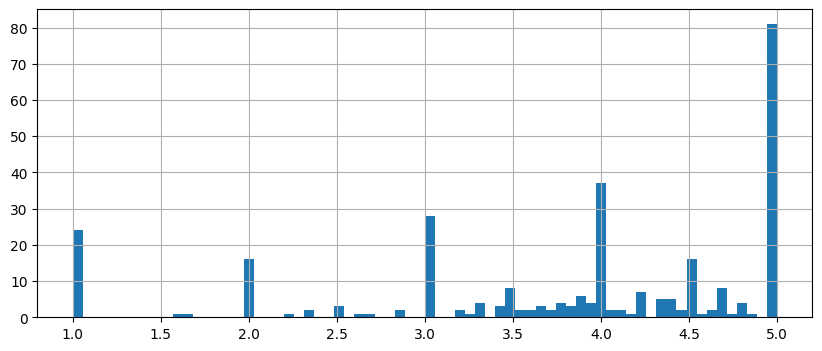

In [ ]:
import matplotlib.pyplot as plt  # Import the pyplot submodule

plt.figure(figsize=(10,4))  # Create a figure with the specified size
ratings['rating'].hist(bins=70)  # Plot the histogram of the 'rating' column


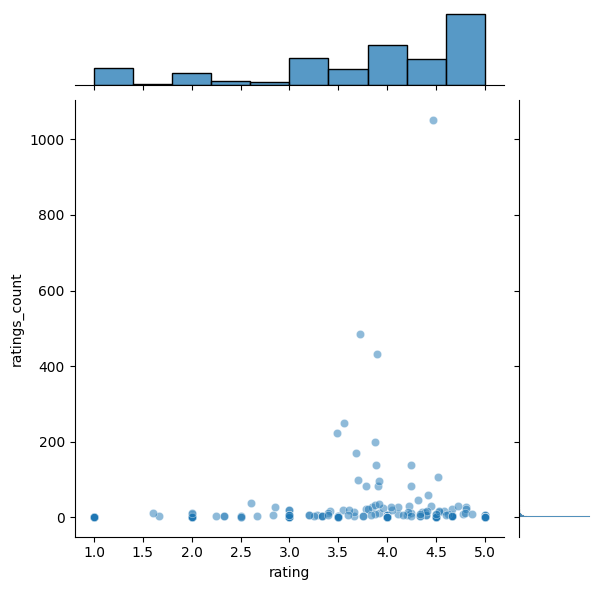

In [ ]:
import seaborn as sns  # Import seaborn for statistical plotting

# Now you can use sns.jointplot
sns.jointplot(x='rating', y='ratings_count', data=ratings, alpha=0.5)


In [ ]:
#popular based

In [ ]:
vote_counts = ratings[ratings['ratings_count'].notnull()]['ratings_count'].astype('int')
vote_averages = ratings[ratings['ratings_average'].notnull()]['ratings_average'].astype('int')
C = vote_averages.mean()
print("Average rating of product across the whole dataset is",C)

Average rating of product across the whole dataset is 3.5953177257525084


In [ ]:
m = vote_counts.quantile(0.95)
print("Minimum votes required to be listed in the chart is",m)

Minimum votes required to be listed in the chart is 62.19999999999925


In [ ]:
ratings.head()

,rating,ratings_count,ratings_average
productId,,,
0132793040,5.000000,1,5.000000
0321732944,5.000000,1,5.000000
0439886341,1.666667,3,1.666667
0511189877,4.500000,6,4.500000
0528881469,2.851852,27,2.851852


In [ ]:
qualified = ratings[(ratings['ratings_count'] >= m) & (ratings['ratings_count'].notnull()) & (ratings['ratings_average'].notnull())][['ratings_count', 'ratings_average']]

In [ ]:
qualified['ratings_count'] = qualified['ratings_count'].astype('int')
qualified['ratings_average'] = qualified['ratings_average'].astype('int')
qualified.head().sort_values(by='ratings_count', ascending=False)

,ratings_count,ratings_average
productId,,
0972683275,1051,4
1400501466,250,3
1400532620,171,3
1400501776,139,3
1400501520,82,4


In [ ]:
qualified.shape

(15, 2)

In [ ]:
def weighted_rating(x):
    v = x['ratings_count']
    R = x['ratings_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
qualified['wr'] = qualified.apply(weighted_rating, axis=1)

In [ ]:
qualified = qualified.sort_values('wr', ascending=False).head(20)

In [ ]:
qualified.head(10)

,ratings_count,ratings_average,wr
productId,,,
0972683275,1051,4,3.977388
1400698987,138,4,3.874270
7214047977,107,4,3.851234
1400501520,82,4,3.825442
6301977173,83,3,3.255019
1400532736,84,3,3.253275
8862935293,95,3,3.235552
9575871979,98,3,3.231141
1400501776,139,3,3.184040


Text(0, 0.5, 'Count')

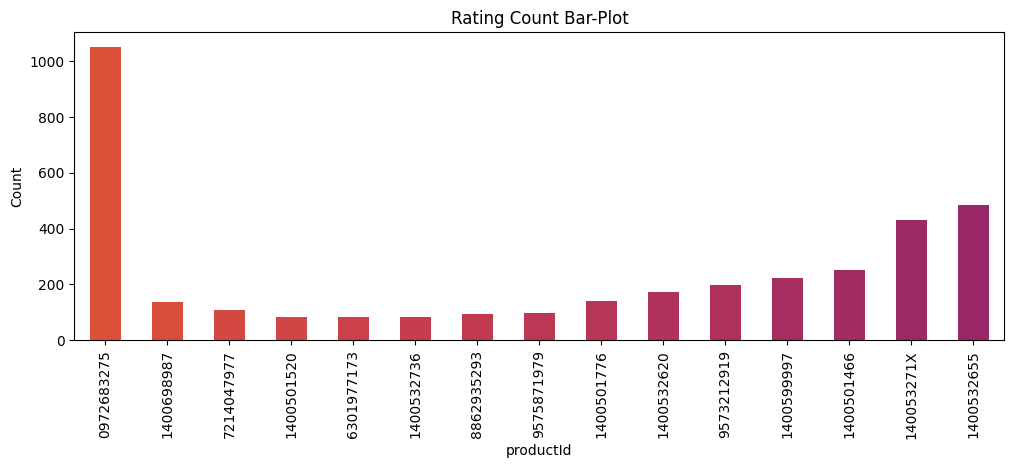

In [ ]:
import numpy as np
from matplotlib import cm
color = cm.inferno_r(np.linspace(.4, .8, 30))

rating_plot_count = qualified['ratings_count'].plot.bar(figsize=(12, 4),color=color)
rating_plot_count.set_title("Rating Count Bar-Plot")
rating_plot_count.set_xlabel("productId")
rating_plot_count.set_ylabel("Count")

Text(0, 0.5, 'rating')

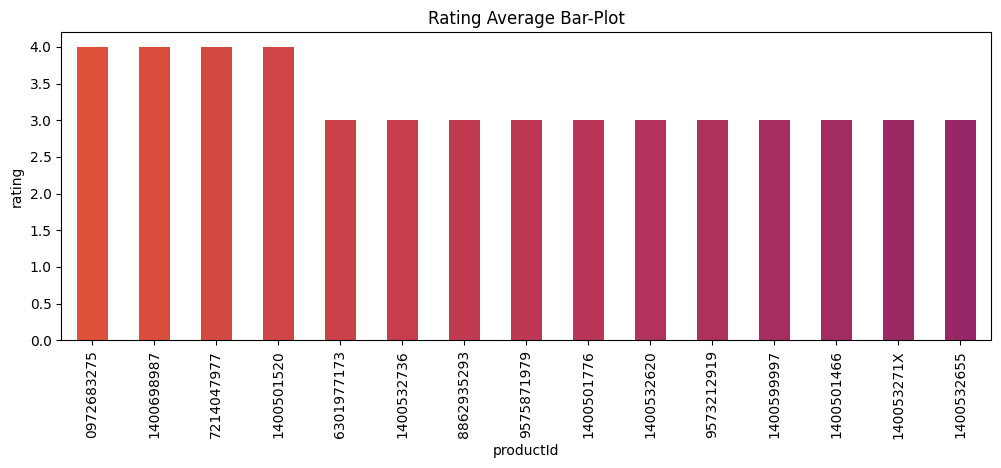

In [ ]:
rating_plot_avg = qualified['ratings_average'].plot.bar(figsize=(12, 4),color=color)
rating_plot_avg.set_title("Rating Average Bar-Plot")
rating_plot_avg.set_xlabel("productId")
rating_plot_avg.set_ylabel("rating")

Text(0, 0.5, 'rating')

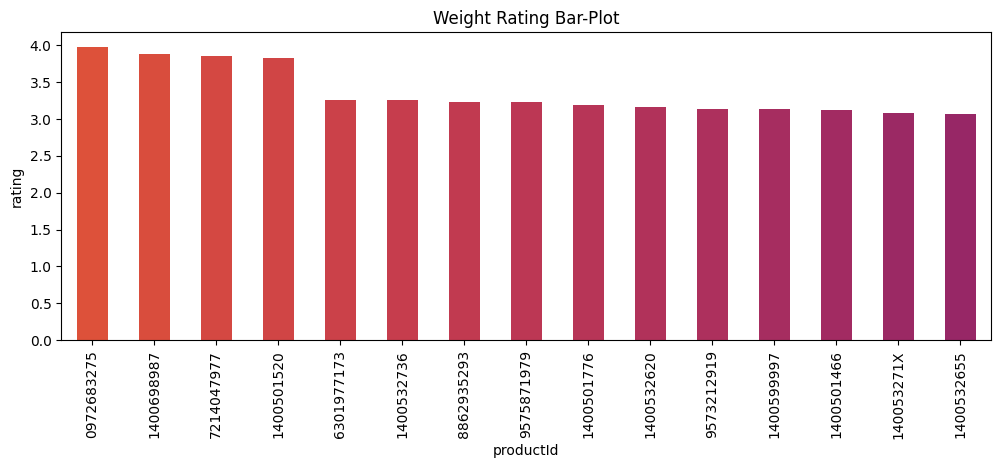

In [ ]:
wr_plot = qualified['wr'].plot.bar(figsize=(12, 4),color=color)
wr_plot.set_title("Weight Rating Bar-Plot")
wr_plot.set_xlabel("productId")
wr_plot.set_ylabel("rating")

In [ ]:
!pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357293 sha256=ba426d51062fb09fff57977f5f8f566bf6fd9e8a21bd60025c0e0ac044b31451
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
from surprise import Reader, Dataset

# Initialize the Reader
reader = Reader()

# Now you can use 'reader' to load and parse your dataset


In [ ]:
df.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [ ]:
data = Dataset.load_from_df(df[['userId', 'productId', 'rating']], reader)

In [ ]:
from surprise import SVD


In [ ]:
# Use the famous SVD algorithm
svd = SVD()

# Run 5-fold cross-validation and then print results
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.3461  1.3667  1.3480  1.3741  1.3751  1.3620  0.0126  
MAE (testset)     1.0943  1.1119  1.0897  1.1170  1.1138  1.1053  0.0111  
Fit time          0.07    0.07    0.07    0.08    0.07    0.07    0.00    
Test time         0.01    0.00    0.00    0.01    0.00    0.00    0.00    


{'test_rmse': array([1.34609005, 1.36667854, 1.34796173, 1.3740847 , 1.37513919]),
 'test_mae': array([1.0943024 , 1.1118917 , 1.08966262, 1.11700884, 1.11380432]),
 'fit_time': (0.07429742813110352,
  0.0686638355255127,
  0.06644701957702637,
  0.07512450218200684,
  0.0731363296508789),
 'test_time': (0.005730867385864258,
  0.004335641860961914,
  0.004141569137573242,
  0.0052454471588134766,
  0.0039789676666259766)}

In [ ]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [ ]:
df.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [ ]:
df['userId'].value_counts()

,count
userId,
A3LDPF5FMB782Z,5
A36V8NDDRZYRYO,3
A3E7PG9CHDBICA,3
AOY9SZTMNQWAW,3
A2FHM5FB0BXKGA,3
...,...
A1W92X1R9QNM2C,1
A1KW4AGRCOIWI2,1
A1B6WHCBJSNO6J,1


In [ ]:
# Check specific userId review
df[df['userId'] == 'A3LDPF5FMB782Z']

,userId,productId,rating,timestamp
1310,A3LDPF5FMB782Z,1400501466,5.0,1336003200
1588,A3LDPF5FMB782Z,1400501520,5.0,1362873600
1696,A3LDPF5FMB782Z,1400501776,5.0,1334102400
2502,A3LDPF5FMB782Z,140053271X,4.0,1310515200
3235,A3LDPF5FMB782Z,1400698987,4.0,1392854400


In [ ]:
# predict based on this data
svd.predict('A3LDPF5FMB782Z', '140053271X', 5.0)

Prediction(uid='A3LDPF5FMB782Z', iid='140053271X', r_ui=5.0, est=4.199220165087573, details={'was_impossible': False})

In [ ]:
print(df.columns)


Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')


Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')
Accuracy: 0.8050
Precision: 0.8103
Recall: 0.9914
F1 Score: 0.8917
Confusion Matrix:
[[  2 188]
 [  7 803]]


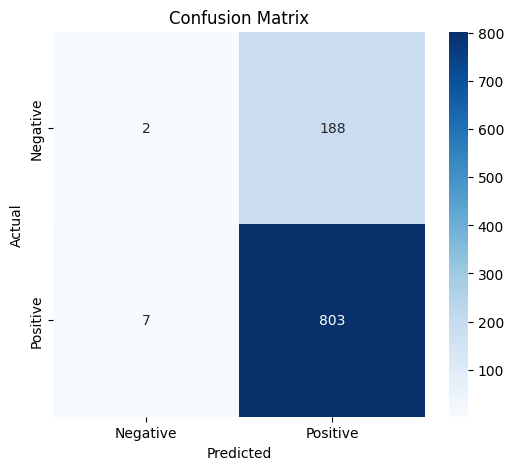

Execution Time: 0.8786 seconds


In [ ]:
#svd
import pandas as pd
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time  # Importing the time module

# Start time
start_time = time.time()

# Assuming 'df' is the DataFrame containing the dataset
# Display the columns to confirm the structure
print(df.columns)

# Initialize the Reader
reader = Reader(rating_scale=(1, 5))  # Assuming ratings are between 1 and 5

# Load dataset from the DataFrame
data = Dataset.load_from_df(df[['userId', 'productId', 'rating']], reader)

# Split into training and test set (80% train, 20% test)
trainset, testset = train_test_split(data, test_size=0.2)

# Use the famous SVD algorithm
svd = SVD()

# Fit the model on the training set
svd.fit(trainset)

# Make predictions on the test set
predictions = svd.test(testset)

# Convert predictions and actuals to arrays
predicted_ratings = [pred.est for pred in predictions]
actual_ratings = [pred.r_ui for pred in predictions]

# Convert to binary classification (e.g., ratings >= 3 as positive, < 3 as negative)
threshold = 3
predicted_binary = [1 if rating >= threshold else 0 for rating in predicted_ratings]
actual_binary = [1 if rating >= threshold else 0 for rating in actual_ratings]

# Calculate Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(actual_binary, predicted_binary)
precision = precision_score(actual_binary, predicted_binary, zero_division=0)
recall = recall_score(actual_binary, predicted_binary, zero_division=0)
f1 = f1_score(actual_binary, predicted_binary, zero_division=0)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculate the confusion matrix
cm = confusion_matrix(actual_binary, predicted_binary)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# End time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.4f} seconds")


In [ ]:
# Assuming you have the userId and productId for which you want to predict the rating
user_id = "A3LDPF5FMB782Z" # Replace with the user ID of interest
product_id = "productId"  # Replace with the product ID of interest

# Make prediction for the given user and product
predicted_rating = svd.predict(user_id, product_id)

# Print the predicted rating
print(f"Predicted rating for user {user_id} and product {product_id}: {predicted_rating.est:.4f}")


Predicted rating for user A3LDPF5FMB782Z and product productId: 4.1924


Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')
Computing the cosine similarity matrix...
Done computing similarity matrix.
Accuracy: 0.8270
Precision: 0.8278
Recall: 0.9988
F1 Score: 0.9053
Confusion Matrix:
[[  0 172]
 [  1 827]]


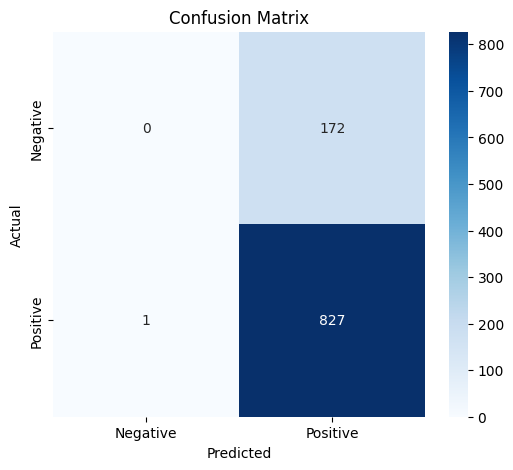

Execution Time: 3.5849 seconds


In [ ]:
#knn
import pandas as pd
from surprise import Reader, Dataset, KNNBasic
from surprise.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time  # Importing the time module

# Start time
start_time = time.time()

# Assuming 'df' is the DataFrame containing the dataset
# Display the columns to confirm the structure
print(df.columns)

# Initialize the Reader
reader = Reader(rating_scale=(1, 5))  # Assuming ratings are between 1 and 5

# Load dataset from the DataFrame
data = Dataset.load_from_df(df[['userId', 'productId', 'rating']], reader)

# Split into training and test set (80% train, 20% test)
trainset, testset = train_test_split(data, test_size=0.2)

# Use the KNN algorithm (Basic collaborative filtering)
sim_options = {
    'name': 'cosine',  # Similarity measure
    'user_based': True  # Compute similarity between users
}
knn = KNNBasic(sim_options=sim_options)

# Fit the model on the training set
knn.fit(trainset)

# Make predictions on the test set
predictions = knn.test(testset)

# Convert predictions and actuals to arrays
predicted_ratings = [pred.est for pred in predictions]
actual_ratings = [pred.r_ui for pred in predictions]

# Convert to binary classification (e.g., ratings >= 3 as positive, < 3 as negative)
threshold = 3
predicted_binary = [1 if rating >= threshold else 0 for rating in predicted_ratings]
actual_binary = [1 if rating >= threshold else 0 for rating in actual_ratings]

# Calculate Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(actual_binary, predicted_binary)
precision = precision_score(actual_binary, predicted_binary, zero_division=0)
recall = recall_score(actual_binary, predicted_binary, zero_division=0)
f1 = f1_score(actual_binary, predicted_binary, zero_division=0)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculate the confusion matrix
cm = confusion_matrix(actual_binary, predicted_binary)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# End time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.4f} seconds")


In [ ]:
from surprise import KNNBasic

# Assuming you have the userId and productId for which you want to predict the rating
user_id = "A3LDPF5FMB782Z	"  # Replace with the user ID of interest
product_id = "1400501520"    # Replace with the product ID of interest

# Initialize KNN algorithm (can also try other variants like KNNWithZScore, KNNWithPearson, etc.)
sim_options = {
    'name': 'cosine',  # Similarity metric (can be 'pearson', 'cosine', etc.)
    'user_based': False  # False means item-based, True means user-based
}
knn = KNNBasic(sim_options=sim_options)

# Fit the model using the training data
trainset, _ = train_test_split(data, test_size=0.2)
knn.fit(trainset)

# Make prediction for the given user and product
predicted_rating = knn.predict(user_id, product_id)

# Print the predicted rating
print(f"Predicted rating for user {user_id} and product {product_id}: {predicted_rating.est:.4f}")


Computing the cosine similarity matrix...
Done computing similarity matrix.
Predicted rating for user A3LDPF5FMB782Z	 and product 1400501520: 3.9820


In [ ]:
pip install implicit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 40.3 MB/s eta 0:00:00


Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')
Accuracy: 0.8020
Precision: 0.8016
Recall: 1.0000
F1 Score: 0.8899
Confusion Matrix:
[[  2 198]
 [  0 800]]


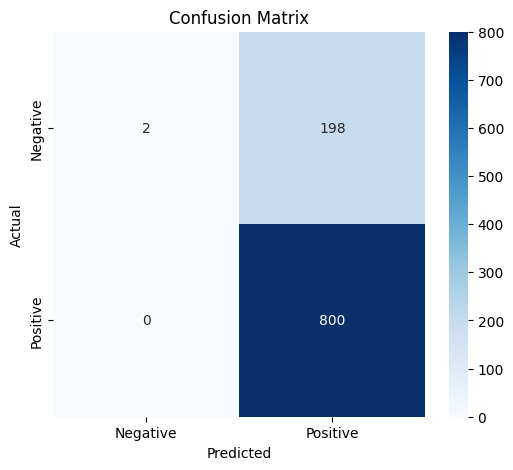

Execution Time: 1.0352 seconds


In [ ]:
#svd++
from surprise import Reader, Dataset, SVDpp
from surprise.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time  # Importing the time module

# Start time
start_time = time.time()

# Assuming 'df' is the DataFrame containing the dataset
# Display the columns to confirm the structure
print(df.columns)

# Initialize the Reader
reader = Reader(rating_scale=(1, 5))  # Assuming ratings are between 1 and 5

# Load dataset from the DataFrame
data = Dataset.load_from_df(df[['userId', 'productId', 'rating']], reader)

# Split into training and test set (80% train, 20% test)
trainset, testset = train_test_split(data, test_size=0.2)

# Use the SVD++ algorithm (Matrix Factorization with implicit feedback)
svdpp = SVDpp()

# Fit the model on the training set
svdpp.fit(trainset)

# Make predictions on the test set
predictions = svdpp.test(testset)

# Convert predictions and actuals to arrays
predicted_ratings = [pred.est for pred in predictions]
actual_ratings = [pred.r_ui for pred in predictions]

# Convert to binary classification (e.g., ratings >= 3 as positive, < 3 as negative)
threshold = 3
predicted_binary = [1 if rating >= threshold else 0 for rating in predicted_ratings]
actual_binary = [1 if rating >= threshold else 0 for rating in actual_ratings]

# Calculate Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(actual_binary, predicted_binary)
precision = precision_score(actual_binary, predicted_binary, zero_division=0)
recall = recall_score(actual_binary, predicted_binary, zero_division=0)
f1 = f1_score(actual_binary, predicted_binary, zero_division=0)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculate the confusion matrix
cm = confusion_matrix(actual_binary, predicted_binary)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# End time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.4f} seconds")


In [ ]:
from surprise import SVDpp
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split

# Assuming df is the DataFrame containing your dataset
# Initialize the Reader
reader = Reader(rating_scale=(1, 5))  # Assuming ratings are between 1 and 5

# Load dataset from the DataFrame
data = Dataset.load_from_df(df[['userId', 'productId', 'rating']], reader)

# Split into training set (80% train, 20% test)
trainset, _ = train_test_split(data, test_size=0.2)

# Initialize the SVD++ algorithm
svdpp = SVDpp()

# Fit the model using the training data
svdpp.fit(trainset)

# Assuming you have the userId and productId for which you want to predict the rating
user_id = "A3LDPF5FMB782Z"  # Replace with the user ID of interest
product_id = "1400501520"    # Replace with the product ID of interest

# Make prediction for the given user and product
predicted_rating = svdpp.predict(user_id, product_id)

# Print the predicted rating
print(f"Predicted rating for user {user_id} and product {product_id}: {predicted_rating.est:.4f}")


Predicted rating for user A3LDPF5FMB782Z and product 1400501520: 4.3898


Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')
Accuracy: 0.8150
Precision: 0.8159
Recall: 0.9975
F1 Score: 0.8976
Confusion Matrix:
[[  4 183]
 [  2 811]]


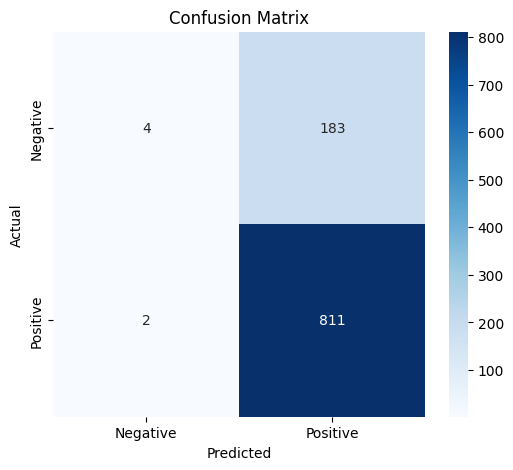

Execution Time: 1.0915 seconds


In [ ]:
#NMF
from surprise import Reader, Dataset, SVDpp
from surprise.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time  # Importing the time module

# Start time
start_time = time.time()

# Assuming 'df' is the DataFrame containing the dataset
# Display the columns to confirm the structure
print(df.columns)

# Initialize the Reader
reader = Reader(rating_scale=(1, 5))  # Assuming ratings are between 1 and 5

# Load dataset from the DataFrame
data = Dataset.load_from_df(df[['userId', 'productId', 'rating']], reader)

# Split into training and test set (80% train, 20% test)
trainset, testset = train_test_split(data, test_size=0.2)

# Use the SVD++ algorithm (Matrix Factorization with implicit feedback)
svdpp = SVDpp()

# Fit the model on the training set
svdpp.fit(trainset)

# Make predictions on the test set
predictions = svdpp.test(testset)

# Convert predictions and actuals to arrays
predicted_ratings = [pred.est for pred in predictions]
actual_ratings = [pred.r_ui for pred in predictions]

# Convert to binary classification (e.g., ratings >= 3 as positive, < 3 as negative)
threshold = 3
predicted_binary = [1 if rating >= threshold else 0 for rating in predicted_ratings]
actual_binary = [1 if rating >= threshold else 0 for rating in actual_ratings]

# Calculate Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(actual_binary, predicted_binary)
precision = precision_score(actual_binary, predicted_binary, zero_division=0)
recall = recall_score(actual_binary, predicted_binary, zero_division=0)
f1 = f1_score(actual_binary, predicted_binary, zero_division=0)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculate the confusion matrix
cm = confusion_matrix(actual_binary, predicted_binary)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# End time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.4f} seconds")


In [ ]:
from surprise import NMF
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split

# Assuming df is the DataFrame containing your dataset
# Initialize the Reader
reader = Reader(rating_scale=(1, 5))  # Assuming ratings are between 1 and 5

# Load dataset from the DataFrame
data = Dataset.load_from_df(df[['userId', 'productId', 'rating']], reader)

# Split into training set (80% train, 20% test)
trainset, _ = train_test_split(data, test_size=0.2)

# Initialize the NMF algorithm
nmf = NMF()

# Fit the model using the training data
nmf.fit(trainset)

# Assuming you have the userId and productId for which you want to predict the rating
user_id = "A3LDPF5FMB782Z"  # Replace with the user ID of interest
product_id = "1400501520"    # Replace with the product ID of interest

# Make prediction for the given user and product
predicted_rating = nmf.predict(user_id, product_id)

# Print the predicted rating
print(f"Predicted rating for user {user_id} and product {product_id}: {predicted_rating.est:.4f}")


Predicted rating for user A3LDPF5FMB782Z and product 1400501520: 4.7962


In [ ]:
#KNNWITHPEARSONCOEFFICIENT

Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')
Computing the pearson similarity matrix...
Done computing similarity matrix.
Accuracy: 0.8320
Precision: 0.8318
Recall: 1.0000
F1 Score: 0.9082
Confusion Matrix:
[[  1 168]
 [  0 831]]


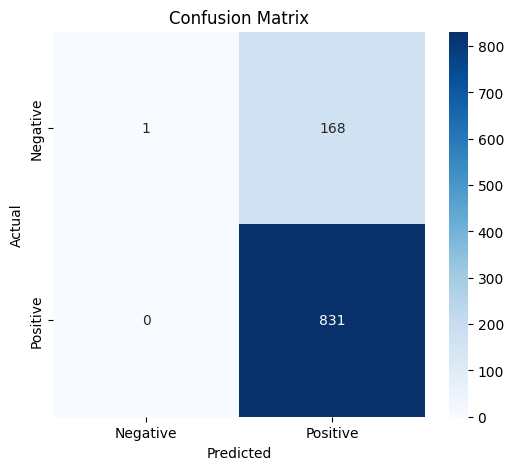

Execution Time: 0.4564 seconds


In [ ]:
from surprise import Reader, Dataset, KNNBasic
from surprise.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time  # Importing the time module

# Start time
start_time = time.time()

# Assuming 'df' is the DataFrame containing the dataset
# Display the columns to confirm the structure
print(df.columns)

# Initialize the Reader
reader = Reader(rating_scale=(1, 5))  # Assuming ratings are between 1 and 5

# Load dataset from the DataFrame
data = Dataset.load_from_df(df[['userId', 'productId', 'rating']], reader)

# Split into training and test set (80% train, 20% test)
trainset, testset = train_test_split(data, test_size=0.2)

# Define similarity options for KNN with Pearson correlation
sim_options = {
    'name': 'pearson',  # Similarity metric (can also try 'cosine', 'pearson', etc.)
    'user_based': False  # False means item-based, True means user-based
}

# Initialize KNN algorithm
knn = KNNBasic(sim_options=sim_options)

# Fit the model on the training set
knn.fit(trainset)

# Make predictions on the test set
predictions = knn.test(testset)

# Convert predictions and actuals to arrays
predicted_ratings = [pred.est for pred in predictions]
actual_ratings = [pred.r_ui for pred in predictions]

# Convert to binary classification (e.g., ratings >= 3 as positive, < 3 as negative)
threshold = 3
predicted_binary = [1 if rating >= threshold else 0 for rating in predicted_ratings]
actual_binary = [1 if rating >= threshold else 0 for rating in actual_ratings]

# Calculate Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(actual_binary, predicted_binary)
precision = precision_score(actual_binary, predicted_binary, zero_division=0)
recall = recall_score(actual_binary, predicted_binary, zero_division=0)
f1 = f1_score(actual_binary, predicted_binary, zero_division=0)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculate the confusion matrix
cm = confusion_matrix(actual_binary, predicted_binary)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# End time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.4f} seconds")


In [ ]:
from surprise import Reader, Dataset, KNNBasic
from surprise.model_selection import train_test_split

# Assuming df is the DataFrame containing your dataset
# Initialize the Reader
reader = Reader(rating_scale=(1, 5))  # Assuming ratings are between 1 and 5

# Load dataset from the DataFrame
data = Dataset.load_from_df(df[['userId', 'productId', 'rating']], reader)

# Split into training set (80% train, 20% test)
trainset, _ = train_test_split(data, test_size=0.2)

# Define similarity options for KNN with Pearson correlation
sim_options = {
    'name': 'pearson',  # Similarity metric (can also try 'cosine', 'pearson', etc.)
    'user_based': False  # False means item-based, True means user-based
}

# Initialize KNN algorithm
knn = KNNBasic(sim_options=sim_options)

# Fit the model on the training set
knn.fit(trainset)

# Assuming you have the userId and productId for which you want to predict the rating
user_id = "A3LDPF5FMB782Z"  # Replace with the user ID of interest
product_id = "1400501520"    # Replace with the product ID of interest

# Make prediction for the given user and product
predicted_rating = knn.predict(user_id, product_id)

# Print the predicted rating
print(f"Predicted rating for user {user_id} and product {product_id}: {predicted_rating.est:.4f}")


Computing the pearson similarity matrix...
Done computing similarity matrix.
Predicted rating for user A3LDPF5FMB782Z and product 1400501520: 5.0000


Accuracy: 0.8210
Precision: 0.8210
Recall: 1.0000
F1 Score: 0.9017
Confusion Matrix:
[[  0 179]
 [  0 821]]


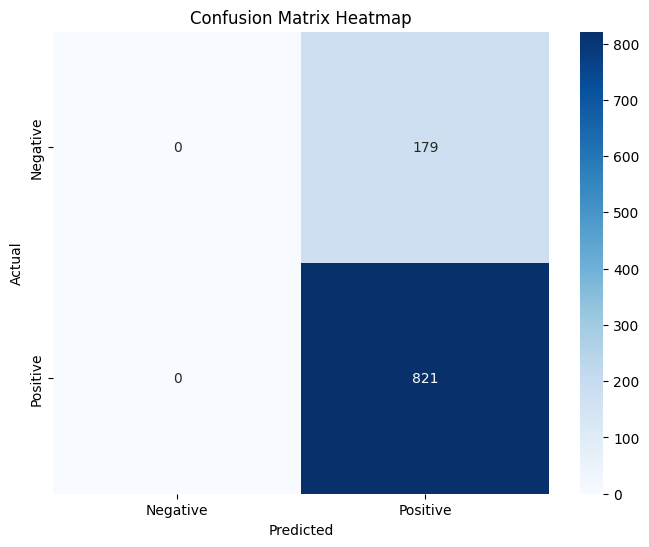

Total execution time: 0.1833 seconds


In [30]:
#Linear REGRESIION
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual DataFrame)
# df = pd.read_csv("your_data.csv") # Replace with your actual data source

# Step 1: Convert categorical variables (userId, productId) to numerical using LabelEncoder
le_user = LabelEncoder()
le_product = LabelEncoder()

df['userIndex'] = le_user.fit_transform(df['userId'])
df['productIndex'] = le_product.fit_transform(df['productId'])

# Step 2: Select features and target
df_features = df[['userIndex', 'productIndex', 'rating']]

# Step 3: Split data into training and testing sets (80% train, 20% test)
train_data, test_data = train_test_split(df_features, test_size=0.2, random_state=1234)

# Step 4: Prepare features (userIndex, productIndex) and target (rating)
X_train = train_data[['userIndex', 'productIndex']]
y_train = train_data['rating']
X_test = test_data[['userIndex', 'productIndex']]
y_test = test_data['rating']

# Step 5: Define and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Start the timer to measure execution time
start_time = time.time()

# Step 6: Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Step 7: Convert the predicted ratings and actual ratings into binary for classification
threshold = 3  # Ratings >= 3 as positive (1), < 3 as negative (0)
y_pred_binary = [1 if rating >= threshold else 0 for rating in y_pred]
y_test_binary = [1 if rating >= threshold else 0 for rating in y_test]

# Step 8: Calculate Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary, zero_division=0)
recall = recall_score(y_test_binary, y_pred_binary, zero_division=0)
f1 = f1_score(y_test_binary, y_pred_binary, zero_division=0)

# Step 9: Print the classification metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Step 10: Calculate and print the confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# End the timer after execution
end_time = time.time()

# Calculate the total time taken for the execution
execution_time = end_time - start_time

# Print the execution time
print(f"Total execution time: {execution_time:.4f} seconds")


In [32]:
# Step: Predicting for a specific user and product

# Assuming userId and productId are known and you want to predict the rating
user_id = "A3LDPF5FMB782Z"  # Replace with the actual userId
product_id = "1400501520"    # Replace with the actual productId

# Convert the userId and productId to numerical indices using the same label encoders used during training
user_index = le_user.transform([user_id])[0]
product_index = le_product.transform([product_id])[0]

# Prepare the feature vector for prediction (userIndex, productIndex)
X_new = np.array([[user_index, product_index]])

# Predict the rating using the trained Logistic Regression model
y_pred_new = lr_model.predict(X_new)

# Convert the predicted rating to binary (1 if rating >= 3, 0 if rating < 3)
predicted_binary_rating = 1 if y_pred_new[0] >= 3 else 0

# Print the predicted binary rating (Positive/Negative)
print(f"Predicted binary rating for user {user_id} and product {product_id}: {predicted_binary_rating}")


Predicted binary rating for user A3LDPF5FMB782Z and product 1400501520: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Assuming you have the predicted ratings
predicted_ratings = [
    "Predicted rating for user A3LDPF5FMB782Z and product 1400501520: 4.5",
    "Predicted rating for user A3LDPF5FMB782Z and product 1400501521: 3.8",
    # Add more ratings here...
]

# Save the predicted ratings to a local file
with open("predicted_ratings.txt", "w") as file:
    for rating in predicted_ratings:
        file.write(rating + "\n")

print("Results saved to 'predicted_ratings.txt'")


Results saved to 'predicted_ratings.txt'


In [ ]:
from google.colab import files
files.download('/content/predicted_ratings.txt')


FileNotFoundError: Cannot find file: /content/predicted_ratings.txt